In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from torchvision import datasets, transforms

train_set = datasets.MNIST('./data', train=True, download=True)
test_set = datasets.MNIST('./data', train=False, download=True)

train_set = train_set.data.numpy()
test_set = test_set.data.numpy()

train_set = train_set / 255.0
test_set = test_set / 255.0

train_set = train_set.reshape(-1, 784)
test_set = test_set.reshape(-1, 784)

In [3]:
def preview(image):
    plt.imshow(image, cmap='gray') 
    plt.axis('off') 
    plt.show()

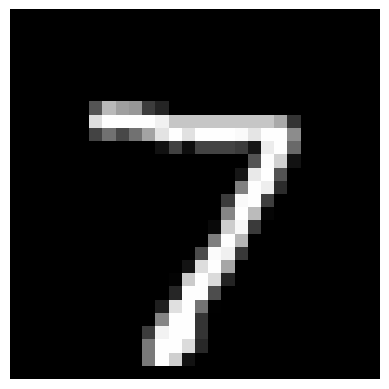

In [4]:
input_size = 28*28
hidden_size = int(input_size / 2)
latent_size = 32
preview(test_set[0].reshape(28, 28))
np.random.seed(42)

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) / (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

In [6]:
learning_rate = 0.001
epochs = 100

In [7]:
# y -> z1 -> z2 -> z3 -> y_pred

W1 = np.random.randn(input_size, hidden_size)  # Weights for the hidden layer
b1 = np.zeros((1, hidden_size))  # Biases for the hidden layer
W2 = np.random.randn(hidden_size, latent_size)  # Weights for the output layer
b2 = np.zeros((1, latent_size))
W3 = np.random.randn(latent_size, hidden_size)  # Weights for the hidden layer
b3 = np.zeros((1, hidden_size))  # Biases for the hidden layer
W4 = np.random.randn(hidden_size, input_size)  # Weights for the output layer
b4 = np.zeros((1, input_size))

def forward(y):
    z1 = np.dot(y, W1) + b1 # input_size -> hidden_size
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2 # hidden_size -> latent_size
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3 # latent_size -> hidden_size
    a3 = sigmoid(z3)  
    z4 = a3.dot(W4) + b4 # hidden_size -> input_size
    a4 = relu(z4)
    return z1, a1, z2, a2, z3, a3, z4, a4

for epoch in range(epochs):
    for y in train_set:
        # Forward propagation
        z1, a1, z2, a2, z3, a3, z4, y_pred = forward(y)
    
        loss = np.mean(0.5 * np.power(y - y_pred, 2)) # Mean Square Loss function
        
        dz4 = y_pred - y  # Assuming a4 is the output of your network
        dW4 = a3.T.dot(dz4)  # Gradient of loss w.r.t. W4
        db4 = np.sum(dz4, axis=0)  # Gradient of loss w.r.t. b4
            
        dz3 = dz4.dot(W4.T) * a3 * (1 - a3)  # Gradient of loss w.r.t. z3 using sigmoid derivative
        dW3 = a2.T.dot(dz3)  # Gradient of loss w.r.t. W3
        db3 = np.sum(dz3, axis=0)  # Gradient of loss w.r.t. b3
        
        dz2 = dz3.dot(W3.T) * (z2 > 0)  # Gradient of loss w.r.t. z2 using ReLU derivative
        dW2 = a1.T.dot(dz2)  # Gradient of loss w.r.t. W2
        db2 = np.sum(dz2, axis=0)  # Gradient of loss w.r.t. b2
        
        dz1 = dz2.dot(W2.T) * a1 * (1 - a1)  # Gradient of loss w.r.t. z1 using sigmoid derivative
        dW1 = W1.dot(dz1.T)  # Gradient of loss w.r.t. W1
        db1 = np.sum(dz1, axis=0)  # Gradient of loss w.r.t. b1
        
        # Update weights and biases for each layer
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1
        
        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        
        W3 = W3 - learning_rate * dW3
        b3 = b3 - learning_rate * db3
        
        W4 = W4 - learning_rate * dW4
        b4 = b4 - learning_rate * db4
        
    print(f"Epoch {epoch}, Loss: {loss}")

/var/folders/4v/przxnqys7mv69gvj61446b2w0000gn/T/ipykernel_91151/4100074866.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 0, Loss: 0.026114743160118734
Epoch 1, Loss: 0.026115217054040803
Epoch 2, Loss: 0.026115238843475372
Epoch 3, Loss: 0.026115234940500345


KeyboardInterrupt: 

In [8]:
# Define the batch size (number of samples in each mini-batch)
batch_size = 32  # You can adjust this value based on your dataset and available memory

# Split your training data into mini-batches
num_samples = len(train_set)
num_batches = num_samples // batch_size

W1 = np.random.randn(input_size, hidden_size)  # Weights for the hidden layer
b1 = np.zeros((1, hidden_size))  # Biases for the hidden layer
W2 = np.random.randn(hidden_size, latent_size)  # Weights for the output layer
b2 = np.zeros((1, latent_size))
W3 = np.random.randn(latent_size, hidden_size)  # Weights for the hidden layer
b3 = np.zeros((1, hidden_size))  # Biases for the hidden layer
W4 = np.random.randn(hidden_size, input_size)  # Weights for the output layer
b4 = np.zeros((1, input_size))

def forward(y):
    z1 = np.dot(y, W1) + b1 # input_size -> hidden_size
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2 # hidden_size -> latent_size
    a2 = relu(z2)
    z3 = np.dot(a2, W3) + b3 # latent_size -> hidden_size
    a3 = sigmoid(z3)  
    z4 = a3.dot(W4) + b4 # hidden_size -> input_size
    a4 = relu(z4)
    return z1, a1, z2, a2, z3, a3, z4, a4

for epoch in range(epochs):
    # Shuffle your training data at the beginning of each epoch to randomize mini-batch order
    np.random.shuffle(train_set)
    
    for i in range(num_batches):
        # Extract a mini-batch
        start = i * batch_size
        end = (i + 1) * batch_size
        mini_batch = train_set[start:end]
        
        # Initialize gradients for each batch
        dW1_batch, db1_batch = 0, 0
        dW2_batch, db2_batch = 0, 0
        dW3_batch, db3_batch = 0, 0
        dW4_batch, db4_batch = 0, 0
        
        # Process each sample in the mini-batch
        for y in mini_batch:
            # Forward propagation
            z1, a1, z2, a2, z3, a3, z4, y_pred = forward(y)

            dz4 = y_pred - y  # Assuming a4 is the output of your network
            dW4 = a3.T.dot(dz4)  # Gradient of loss w.r.t. W4
            db4 = np.sum(dz4, axis=0)  # Gradient of loss w.r.t. b4
                
            dz3 = dz4.dot(W4.T) * a3 * (1 - a3)  # Gradient of loss w.r.t. z3 using sigmoid derivative
            dW3 = a2.T.dot(dz3)  # Gradient of loss w.r.t. W3
            db3 = np.sum(dz3, axis=0)  # Gradient of loss w.r.t. b3
            
            dz2 = dz3.dot(W3.T) * (z2 > 0)  # Gradient of loss w.r.t. z2 using ReLU derivative
            dW2 = a1.T.dot(dz2)  # Gradient of loss w.r.t. W2
            db2 = np.sum(dz2, axis=0)  # Gradient of loss w.r.t. b2
            
            dz1 = dz2.dot(W2.T) * a1 * (1 - a1)  # Gradient of loss w.r.t. z1 using sigmoid derivative
            dW1 = W1.dot(dz1.T)  # Gradient of loss w.r.t. W1
            db1 = np.sum(dz1, axis=0)  # Gradient of loss w.r.t. b1

            dW1_batch += dW1
            dW2_batch += dW2
            dW3_batch += dW3
            dW4_batch += dW4

        
        W1 = W1 - (learning_rate / batch_size) * (dW1_batch / batch_size)
        b1 = b1 - (learning_rate / batch_size) * (db1_batch / batch_size)

        W2 = W2 - (learning_rate / batch_size) * (dW2_batch / batch_size)
        b2 = b2 - (learning_rate / batch_size) * (db2_batch / batch_size)

        W3 = W3 - (learning_rate / batch_size) * (dW3_batch / batch_size)
        b3 = b3 - (learning_rate / batch_size) * (db3_batch / batch_size)
        
        W4 = W4 - (learning_rate / batch_size) * (dW4_batch / batch_size)
        b4 = b4 - (learning_rate / batch_size) * (db4_batch / batch_size)
        
        
    # Calculate and print the loss at the end of each epoch
    total_loss = 0
    for y in train_set:
        _, _, _, _, _, _, _, y_pred = forward(y)
        loss = np.mean(0.5 * np.power(y - y_pred, 2))
        total_loss += loss
    avg_loss = total_loss / num_samples
    print(f"Epoch {epoch}, Loss: {avg_loss}")


KeyboardInterrupt: 

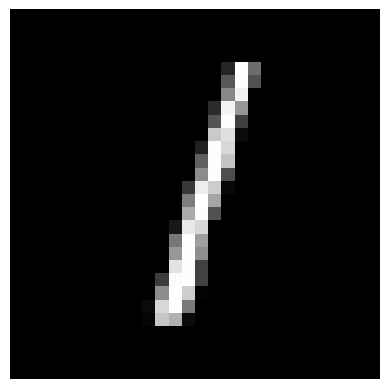

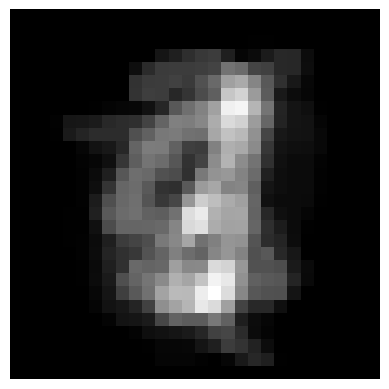

In [45]:
sample = test_set[2]
preview(sample.reshape(28, 28))
_, _, _, _, _, _, _, result = forward(sample)
preview(result.reshape(28, 28))